<a href="https://colab.research.google.com/github/Freddyx94/UE/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
 You are hired as a Junior Risk Analyst. Your task is to clean and prepare the Titanic dataset so it can be used for a survival risk prediction model. The raw data contains missing values, duplicates, wrong data types, and outliers. Follow the agenda below to transform it into a clean, model-ready dataset.

# Agenda / Steps to Complete
1. Load & Inspect Data
Import libraries and load the Titanic dataset.
View first rows, shape, column names, and data types.
Get basic numeric and categorical summaries.
2. Duplicate & Missing Value Check
Detects and removes duplicate rows.
Count missing values (number & percentage).
Visualize missing values using a heatmap.
3. Handle Missing Values
Drop the deck column (too many missing values).
Impute:
age → median
embarked, embark_town → mode -> Most repeated entry in the column
4. Fix Data Types
Convert relevant columns (sex, class, embarked, etc.) to categorical.
Check unique values for categorical variables.


1. Load & Inspect Data Import libraries and load the Titanic dataset. View first rows, shape, column names, and data types. Get basic numeric and categorical summaries.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set_theme()

print(' Titanic Libraries imported successfully!')

# Load dataset
titanic = sns.load_dataset('titanic')
df = titanic.copy()

df.head()

 Titanic Libraries imported successfully!


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


2. Duplicate & Missing Value Check Detects and removes duplicate rows. Count missing values (number & percentage). Visualize missing values using a heatmap.

In [8]:
# Check for Duplicates

print("Number of duplicate rows:")
df.duplicated().sum()

Number of duplicate rows:


np.int64(107)

Shape after removing duplicates: (784, 15)


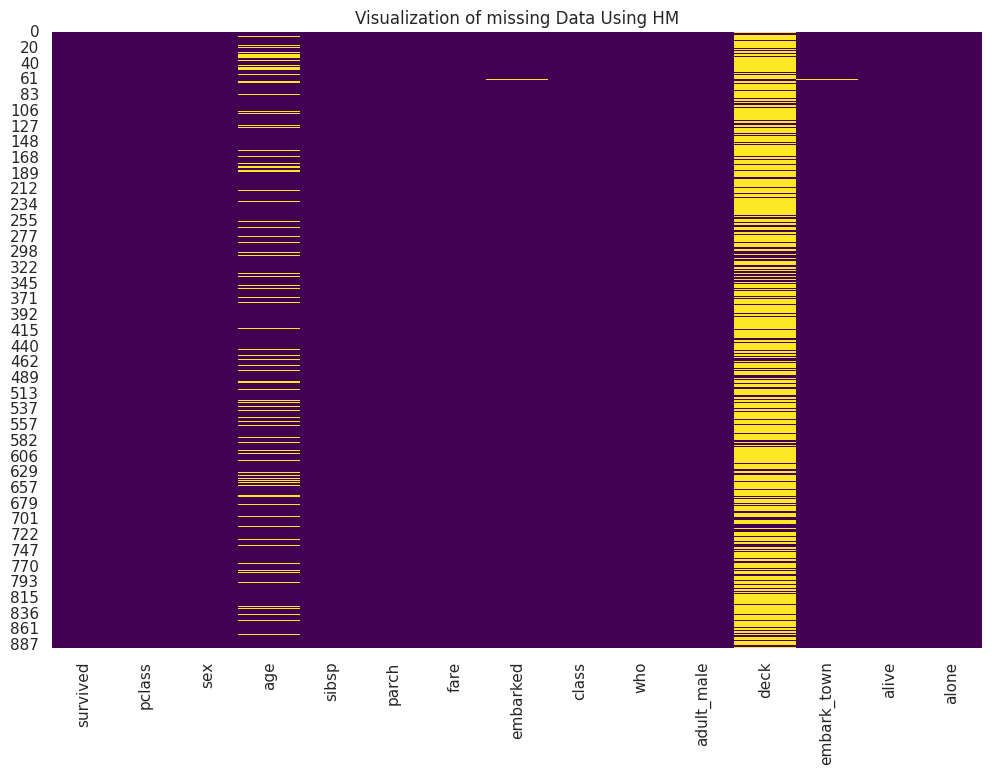

In [13]:
# Remove duplicates and update the dataframe

df = df.drop_duplicates()

# Count missing Value
print("Shape after removing duplicates:", df.shape)

#Visualizing missing value
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualization of missing Data Using HM')
plt.show()

3. Handle Missing Values Drop the deck column (too many missing values). Impute: age → median embarked, embark_town → mode -> Most repeated entry in the column

In [14]:
# Drop the deck column due to too many missing Values

df.drop('deck', axis=1, inplace=True)
print("Columns after dropping 'deck':", df.columns.tolist())

Columns after dropping 'deck': ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']


In [20]:
#Impute age with Median

if 'age' in df.columns:
    age_median = df['age'].median()
    df['age'] = df['age'].fillna(age_median)
    print(f"Imputed 'age' with median: {age_median:.2f}")


Imputed 'age' with median: 28.25


In [21]:

# Impute 'embarked' and 'embark_town' with mode

for col in ['embarked', 'embark_town']:
    if col in df.columns:
        modes = df[col].mode(dropna=True)
        if len(modes) > 0:
            df[col] = df[col].fillna(modes.iloc[0])
            print(f"Imputed '{col}' with mode: {modes.iloc[0]}")
        else:
            print(f"No mode found for '{col}'. Column may be fully NaN.")

Imputed 'embarked' with mode: S
Imputed 'embark_town' with mode: Southampton


4. Fix Data Types Convert relevant columns (sex, class, embarked, etc.) to categorical. Check unique values for categorical variables.

In [24]:
# Identifying columms to convert to categorical data type
cat_cols = ['sex', 'embarked', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone']

# Convert data type
for col in cat_cols:
  df[col] = df[col].astype('category')
  # Check Updated data type
  print("\\nData Types after Conversion:")
  df.info()


\nData Types after Conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    category
 3   age          784 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     784 non-null    category
 8   class        784 non-null    category
 9   who          784 non-null    category
 10  adult_male   784 non-null    category
 11  embark_town  784 non-null    category
 12  alive        784 non-null    category
 13  alone        784 non-null    category
dtypes: category(8), float64(2), int64(4)
memory usage: 49.9 KB
\nData Types after Conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total

In [26]:
# Check unique Values
print("\\nUnique Values in Categorical Columns:")
for col in cat_cols:
  print(f"'{col}': {df[col].unique().tolist()}")

\nUnique Values in Categorical Columns:
'sex': ['male', 'female']
'embarked': ['S', 'C', 'Q']
'embark_town': ['Southampton', 'Cherbourg', 'Queenstown']
'alive': ['no', 'yes']
'class': ['Third', 'First', 'Second']
'who': ['man', 'woman', 'child']
'adult_male': [True, False]
'alone': [False, True]
